# Notebook for training first-motion polarity (FMP) determination with DiTingTools

In [1]:
# workaround imoort
# path to diting src
import sys
sys.path.append('../../')
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import yaml
cfgs = yaml.load(open('../demo_data/fmp_cfgs/fmp_example.yaml','r'),Loader=yaml.Loader)
os.environ['CUDA_VISIBLE_DEVICES'] = cfgs['Training']['GPU_ID']

# Visualize dataset

In [3]:
from dtt.dev.fmp.tfDataset import get_FMP_training_dataset

In [4]:
train_set, val_set = get_FMP_training_dataset(cfgs)

2022-04-20 15:13:35.728387: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-20 15:13:39.501433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:b1:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-04-20 15:13:39.502026: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-04-20 15:13:39.504702: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-04-20 15:13:39.507174: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-04-20 15:13:39.508198: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so

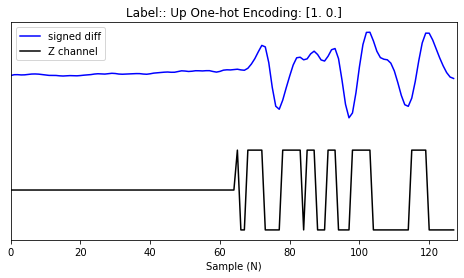

In [24]:
batch_size = 1
for output_data in train_set.batch(batch_size).take(1):
    for bdx in range(batch_size):
        plt.figure(figsize=(8,4))
        plt.plot(output_data[0].numpy()[bdx,:,0] + 3,color='b',label='signed diff')
        plt.plot(output_data[0].numpy()[bdx,:,1],color='k',label='Z channel')
        plt.xlim([0,128])
        plt.yticks([])
        plt.xlabel('Sample (N)')
        plt.legend(loc='upper left')
        plt.title('Label:: Up One-hot Encoding: {}'.format(output_data[1]['T0D3'][0,:2]))
        plt.show()
        plt.close()

# Start training

In [6]:
from dtt.dev.fmp.train import train

In [7]:
train(cfgs)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 2)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 128, 8)       56          input[0][0]                      
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 128, 8)       56          input[0][0]                      
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 128, 8)       88          input[0][0]                      
______________________________________________________________________________________________

Done Creating Generator


2022-04-19 12:05:59.710330: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-04-19 12:05:59.966736: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


100/100 [==============================] - 19s 195ms/step - loss: 5.2977 - o3_loss: 0.6401 - o4_loss: 0.6821 - o5_loss: 0.6503 - ofuse_loss: 0.7004 - o3_clarity_loss: 0.6898 - o4_clarity_loss: 0.6451 - o5_clarity_loss: 0.6943 - ofuse_clarity_loss: 0.5955 - o3_accuracy: 0.4975 - o4_accuracy: 0.5197 - o5_accuracy: 0.4941 - ofuse_accuracy: 0.4491 - o3_clarity_accuracy: 0.3234 - o4_clarity_accuracy: 0.5734 - o5_clarity_accuracy: 0.4737 - ofuse_clarity_accuracy: 0.6509 - val_loss: 4.7405 - val_o3_loss: 0.5690 - val_o4_loss: 0.6302 - val_o5_loss: 0.5696 - val_ofuse_loss: 0.6484 - val_o3_clarity_loss: 0.6596 - val_o4_clarity_loss: 0.5461 - val_o5_clarity_loss: 0.6754 - val_ofuse_clarity_loss: 0.4421 - val_o3_accuracy: 0.5556 - val_o4_accuracy: 0.5556 - val_o5_accuracy: 0.6667 - val_ofuse_accuracy: 0.3333 - val_o3_clarity_accuracy: 0.4444 - val_o4_clarity_accuracy: 0.6667 - val_o5_clarity_accuracy: 0.6667 - val_ofuse_clarity_accuracy: 0.7778 - lr: 1.0000e-04
